<a href="https://colab.research.google.com/github/Saisathwika-08/Generative-AI/blob/main/2303A52204_WEEK10_ASS(10.1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 69s 35ms/step - accuracy: 0.9132 - loss: 0.2868 - val_accuracy: 0.9873 - val_loss: 0.0398
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 65s 35ms/step - accuracy: 0.9873 - loss: 0.0421 - val_accuracy: 0.9887 - val_loss: 0.0302
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 77s 32ms/step - accuracy: 0.9918 - loss: 0.0267 - val_accuracy: 0.9905 - val_loss: 0.0296
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 87s 34ms/step - accuracy: 0.9933 - loss: 0.0198 - val_accuracy: 0.9902 - val_loss: 0.0312
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 34ms/step - accuracy: 0.9956 - loss: 0.0136 - val_accuracy: 0.9915 - val_loss: 0.0297
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 34ms/step - accuracy: 0.9968 - loss: 0.0102 - val_accuracy: 0.9921 - val_loss: 0.0279
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 35ms/step - accuracy: 0.9968 - loss: 0.0098 - val_accuracy: 0.9904 - val_loss: 0.0339
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 35ms/step - accuracy: 0.9978 -

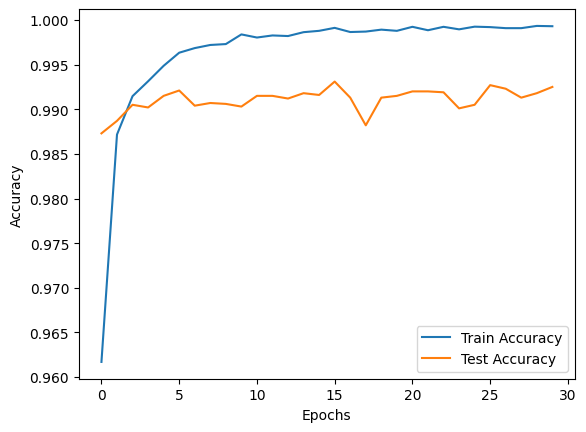

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt


(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0


x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)


model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_test, y_test))


train_loss, train_acc = model.evaluate(x_train, y_train, verbose=2)
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

print(f'Training Accuracy: {train_acc * 100:.2f}%')
print(f'Testing Accuracy: {test_acc * 100:.2f}%')


plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
